In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train.astype('float32')/255. , x_test.astype('float32')/255.

x_train, x_test = x_train.reshape([-1, 28, 28, 1]), x_test.reshape([-1, 28, 28, 1]) # 28 x 28 x 1(채널수)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape = (28,28,1), kernel_size = (3,3), filters = 32, activation='relu'))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu'))
cnn.add(Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu'))

cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(32, activation = 'relu'))
cnn.add(Dropout(0.2))

cnn.add(Dense(10, activation = 'softmax')) # loss function = softmax -> sparse_categorical_crossentropy
                                           # activation 안쓸경우 -> ~~~ logits

In [4]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])
# sparse_categorical_crossentropy : one-hot vector로 자동으로 변경해서 계산해주는 함수
# [0.1, 0.15, 0.5, 0.1 ...] 제일 높은 index를 가져온다.

cnn.summary()
# conv2d (Conv2D)              (None, 26, 26, 32)        320   <-- (3*3)*32 + 32(bias = 채널 개수만큼: 처음(3*3)에 b1이 다 더해지고
#                                                                                       두번째 채널(3*3에는 b2가 다 더해지고 .... b32까지 있으므로 32개))
# conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496  <-- 32 * (3*3)*64 + 64(bias)
# conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928  <-- 64 * (3*3)*64 + 64(bias)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [5]:
result = cnn.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 10s 21ms/step - loss: 0.3295 - accuracy: 0.8964 - val_loss: 0.0590 - val_accuracy: 0.9817
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1047 - accuracy: 0.9686 - val_loss: 0.0424 - val_accuracy: 0.9864
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0737 - accuracy: 0.9781 - val_loss: 0.0382 - val_accuracy: 0.9872
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0629 - accuracy: 0.9812 - val_loss: 0.0315 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9843 - val_loss: 0.0279 - val_accuracy: 0.9899
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0481 - accuracy: 0.9854 - val_loss: 0.0269 - val_accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0209 - val_accuracy: 0.9929
Epoc

In [6]:
cnn.evaluate(x_test, y_test) # evaluate로 적절하지 않음 -> test데이터로 validation을 했기 때문에 똑같은 accuracy가 나옴

313/313 [==============================] - 1s 3ms/step - loss: 0.0200 - accuracy: 0.9936


[0.020039120689034462, 0.9936000108718872]

In [7]:
import matplotlib.pyplot as plt

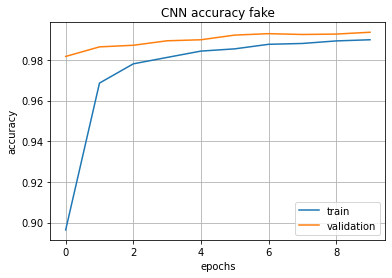

In [13]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('CNN accuracy fake')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train', 'validation'], loc='best')